# How to show K-Means Clustering In this Dataset

Import required Libraries

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Import Dataset using Pandas Library

In [40]:
Dataset=pd.read_csv('Mall_Customers.csv')
Dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Check Null values

In [41]:
Dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 I found 0 null values

In [42]:
Dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
Dataset['Genre'].replace({"Male":0,"Female":1},inplace=True)
Dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


string dataset replace with numerical format 
with the help of (.replace) method 

In [64]:
Subset=Dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
Subset

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [65]:
from sklearn.cluster import KMeans
WCSS= []  
# WCSS ( Within-Cluster Sum of Square )

# Choose Number of Clusters

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 

In [66]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(Subset)
    WCSS.append(kmeans.inertia_)

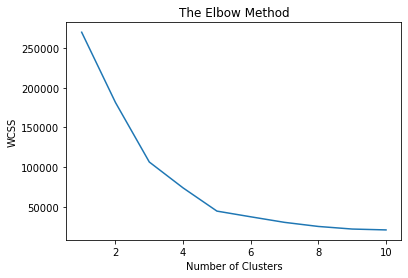

In [67]:
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [68]:
KMmodel_1 = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [69]:
KMmodel_2 =  KMmodel_1.fit_predict(Subset)

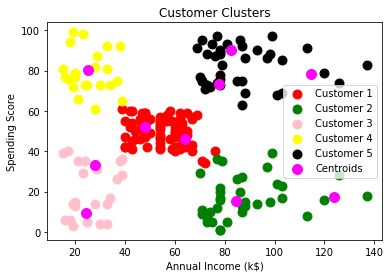

In [76]:
plt.scatter(Subset[KMmodel_2 == 0,0],Subset[KMmodel_2 == 0,1], s=80, c='red', label='Customer 1')
plt.scatter(Subset[KMmodel_2 == 1,0],Subset[KMmodel_2 == 1,1], s=80, c='green', label='Customer 2')
plt.scatter(Subset[KMmodel_2 == 2,0],Subset[KMmodel_2 == 2,1], s=80, c='pink', label='Customer 3')
plt.scatter(Subset[KMmodel_2 == 3,0],Subset[KMmodel_2 == 3,1], s=80, c='yellow', label='Customer 4')
plt.scatter(Subset[KMmodel_2 == 4,0],Subset[KMmodel_2 == 4,1], s=80, c='black', label='Customer 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()